In [53]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='U4YIjdxkgwarX_BQWbuE-s4mxI-ycXmUQY84ilbgqYtw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'juypternotebook-donotdelete-pr-fidxsm23vkyemc'
object_key = 'DistrictswiseCR_AEdataf_24-25.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,Category,States/UT's,Districts,No. of CSCs,Female,Male,Total,General,OBC,SC,ST,Total.1
0,Case Registered,Andaman and Nicobar,Nicobar,5,615,852,1467,557,315,546,49,1467
1,Case Registered,Andaman and Nicobar,North and Middle Andaman,37,765,1114,1879,199,187,1436,57,1879
2,Case Registered,Andaman and Nicobar,South Andaman,31,340,251,591,42,89,430,30,591
3,Case Registered,Andhra Pradesh,Alluri Sitharama Raju,430,6370,6828,13198,3585,4660,3176,1777,13198
4,Case Registered,Andhra Pradesh,Anakapalli,646,6311,6267,12578,3532,4196,4347,503,12578
5,Case Registered,Andhra Pradesh,Anantapur,577,10050,21628,31678,9189,8651,12245,1593,31678
6,Case Registered,Andhra Pradesh,Annamayya,501,2039,1181,3220,1173,776,1118,153,3220
7,Case Registered,Andhra Pradesh,Bapatla,461,1756,1960,3716,1729,680,1120,187,3716
8,Case Registered,Andhra Pradesh,Chittoor,724,24254,12256,36510,19944,8818,7115,633,36510
9,Case Registered,Andhra Pradesh,East Godavari,300,5908,7332,13240,7032,3230,2370,608,13240


In [58]:
df_1.columns = df_1.columns.str.strip().str.lower().str.replace(' ', '_')
print("Cleaned column names:")
print(df_1.columns.tolist())


Cleaned column names:
['category', "states/ut's", 'districts', 'no._of_cscs', 'female', 'male', 'total', 'general', 'obc', 'sc', 'st', 'total.1']


In [59]:
print("\nSample data:")
print(df_1.head())


Sample data:
          category          states/ut's                 districts  \
0  Case Registered  Andaman and Nicobar                   Nicobar   
1  Case Registered  Andaman and Nicobar  North and Middle Andaman   
2  Case Registered  Andaman and Nicobar             South Andaman   
3  Case Registered       Andhra Pradesh     Alluri Sitharama Raju   
4  Case Registered       Andhra Pradesh                Anakapalli   

   no._of_cscs  female  male  total  general   obc    sc    st  total.1  
0            5     615   852   1467      557   315   546    49     1467  
1           37     765  1114   1879      199   187  1436    57     1879  
2           31     340   251    591       42    89   430    30      591  
3          430    6370  6828  13198     3585  4660  3176  1777    13198  
4          646    6311  6267  12578     3532  4196  4347   503    12578  


In [61]:
print(df_1.columns.tolist())


['category', "states/ut's", 'districts', 'no._of_cscs', 'female', 'male', 'total', 'general', 'obc', 'sc', 'st', 'total.1']


In [62]:
# Column mappings based on your dataset
state_col = "states/ut's"
district_col = 'districts'
cases_col = 'total'  # Assuming this is total number of cases registered
csc_col = 'no._of_cscs'

# Gender-wise case columns
female_col = 'female'
male_col = 'male'

# Caste-wise case columns
general_col = 'general'
obc_col = 'obc'
sc_col = 'sc'
st_col = 'st'


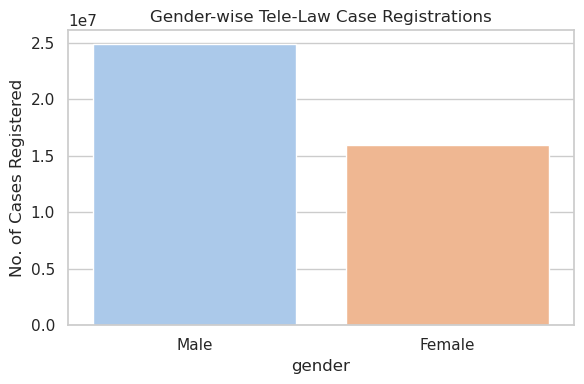

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_summary = pd.DataFrame({
    'gender': ['Male', 'Female'],
    'cases': [df_1[male_col].sum(), df_1[female_col].sum()]
})

plt.figure(figsize=(6,4))
sns.barplot(data=gender_summary, x='gender', y='cases', palette='pastel')
plt.title('Gender-wise Tele-Law Case Registrations')
plt.ylabel('No. of Cases Registered')
plt.tight_layout()
plt.show()


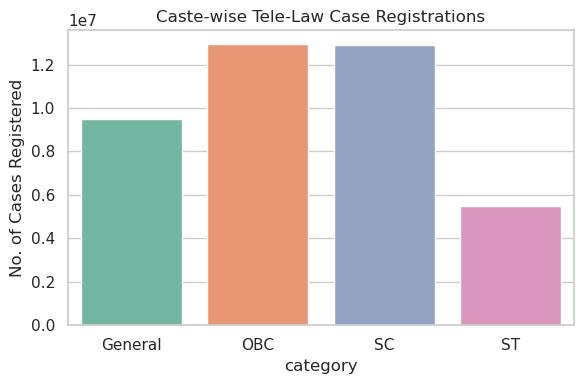

In [64]:
caste_summary = pd.DataFrame({
    'category': ['General', 'OBC', 'SC', 'ST'],
    'cases': [
        df_1[general_col].sum(),
        df_1[obc_col].sum(),
        df_1[sc_col].sum(),
        df_1[st_col].sum()
    ]
})

plt.figure(figsize=(6,4))
sns.barplot(data=caste_summary, x='category', y='cases', palette='Set2')
plt.title('Caste-wise Tele-Law Case Registrations')
plt.ylabel('No. of Cases Registered')
plt.tight_layout()
plt.show()


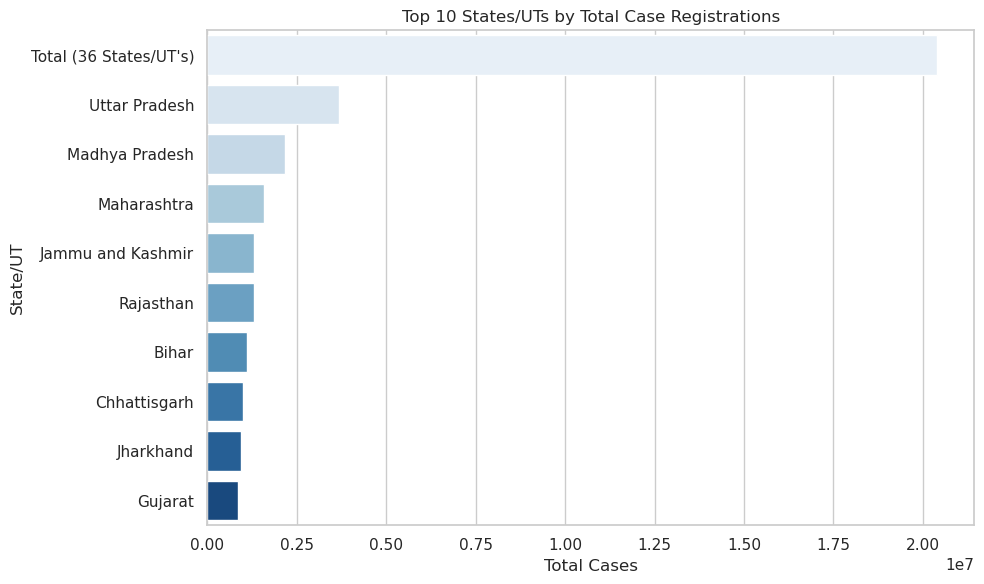

In [65]:
state_summary = df_1.groupby(state_col)[cases_col].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=state_summary.head(10), x=cases_col, y=state_col, palette='Blues')
plt.title('Top 10 States/UTs by Total Case Registrations')
plt.xlabel('Total Cases')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


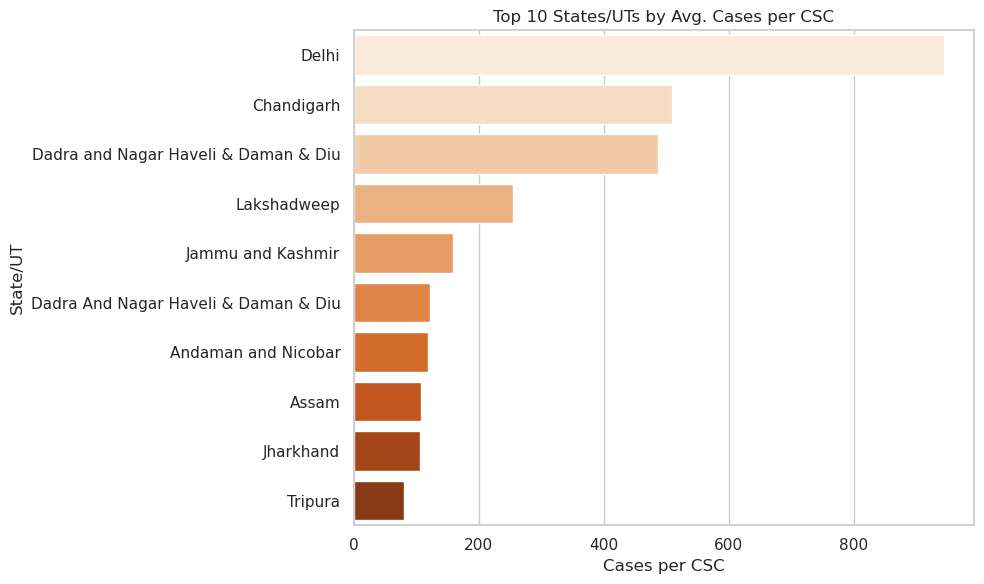

In [66]:
df_1['cases_per_csc'] = df_1[cases_col] / df_1[csc_col].replace(0, 1)  # prevent division by 0

normalized_state = df_1.groupby(state_col)['cases_per_csc'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=normalized_state.head(10), x='cases_per_csc', y=state_col, palette='Oranges')
plt.title('Top 10 States/UTs by Avg. Cases per CSC')
plt.xlabel('Cases per CSC')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


In [67]:
# Export gender-wise summary
gender_summary.to_csv("gender_wise_summary.csv", index=False)

# Export caste-wise summary
caste_summary.to_csv("caste_wise_summary.csv", index=False)

# Export state-wise summary
state_summary.to_csv("state_wise_summary.csv", index=False)

# Export normalized CSC state data
normalized_state.to_csv("normalized_state_summary.csv", index=False)

# Export full processed DataFrame
df_1.to_csv("processed_full_dataset.csv", index=False)

print("✔ All summaries exported as CSV.")


✔ All summaries exported as CSV.


In [68]:
# Top 10 districts by total cases
top_districts = df_1.groupby([state_col, district_col])[cases_col].sum().reset_index().sort_values(by=cases_col, ascending=False).head(10)

# Bottom 10 (with non-zero cases)
bottom_districts = df_1[df_1[cases_col] > 0].groupby([state_col, district_col])[cases_col].sum().reset_index().sort_values(by=cases_col, ascending=True).head(10)

print("\n🏆 Top 10 Districts by Total Cases:")
print(top_districts)

print("\n⚠️ Bottom 10 Districts by Total Cases (excluding 0):")
print(bottom_districts)



🏆 Top 10 Districts by Total Cases:
                states/ut's             districts     total
672  Total (36 States/UT's)  Tota (785 Districts)  20409376
690           Uttar Pradesh              Bahraich    394133
526                  Punjab             Firozepur    248531
249       Jammu and Kashmir                Budgam    234626
248       Jammu and Kashmir             Baramulla    227417
727           Uttar Pradesh                 Kheri    225396
429             Maharashtra                Washim    214881
751           Uttar Pradesh               Sitapur    198222
149            Chhattisgarh            Mahasamund    197828
350          Madhya Pradesh            Chhatarpur    197394

⚠️ Bottom 10 Districts by Total Cases (excluding 0):
           states/ut's      districts  total
460           Nagaland         Noklak      6
426            Manipur       Kakching      8
425            Manipur        Jiribam     12
559          Rajasthan  Neem Ka Thana     14
427            Manipur   

In [69]:
df_1['cases_per_csc'] = df_1[cases_col] / df_1[csc_col].replace(0, 1)

district_csc_normalized = df_1.groupby([state_col, district_col])['cases_per_csc'].mean().reset_index()

# Top & bottom normalized
top_csc_districts = district_csc_normalized.sort_values(by='cases_per_csc', ascending=False).head(10)
bottom_csc_districts = district_csc_normalized[district_csc_normalized['cases_per_csc'] > 0].sort_values(by='cases_per_csc').head(10)

print("\n🏅 Top 10 Districts by Cases per CSC:")
print(top_csc_districts)

print("\n📉 Bottom 10 Districts by Cases per CSC (excluding 0):")
print(bottom_csc_districts)



🏅 Top 10 Districts by Cases per CSC:
                              states/ut's               districts  \
168                                 Delhi               New Delhi   
167                                 Delhi                    East   
170                                 Delhi              North East   
171                                 Delhi              North West   
169                                 Delhi                   North   
166                                 Delhi                 Central   
172                                 Delhi                Shahdara   
105                                 Bihar                Khagaria   
128                            Chandigarh              Chandigarh   
162  Dadra And Nagar Haveli & Daman & Diu  Dadra And Nagar Haveli   

     cases_per_csc  
168    2027.000000  
167    1681.000000  
170    1551.500000  
171    1251.500000  
169    1179.000000  
166    1159.500000  
172     607.000000  
105     569.581395  
128     509.2